In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the datasets
superstore_path = "/work/SampleSuperstore.csv" 
population_path = "/work/us_pop_by_state.csv"  

superstore = pd.read_csv(superstore_path)
population = pd.read_csv(population_path)

# Display the initial rows of each dataset
print("Superstore Data:\n", superstore.head())
print("Population Data:\n", population.head())

# Preprocessing Superstore Dataset
superstore_agg = superstore.groupby('State').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    transaction_count=('Segment', 'count')
).reset_index()

# Preprocessing Population Dataset
population.rename(columns={'state': 'State', 'Population': 'population'}, inplace=True)

# Merge datasets on State
merged_data = pd.merge(superstore_agg, population, on='State', how='inner')
print(merged_data.head())
# Feature Engineering
merged_data['sales_per_capita'] = merged_data['total_sales'] / merged_data['2020_census']
merged_data['profit_per_capita'] = merged_data['total_profit'] / merged_data['2020_census']
merged_data['sales_potential_score'] = (
    merged_data['sales_per_capita'] * 0.5 + (merged_data['total_sales'] / merged_data['transaction_count']) * 0.5
)

Superstore Data:
         Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2 

> # Display merged data
print("Merged Data:\n", merged_data)

In [2]:
merged_data

,State,total_sales,total_profit,transaction_count,rank,state_code,2020_census,percent_of_total,sales_per_capita,profit_per_capita,sales_potential_score
0,Alabama,19510.6400,5786.8253,61,24.0,AL,5024279,0.0148,0.003883,0.001152,159.925220
1,Arizona,35282.0010,-3427.9246,224,14.0,AZ,7151502,0.0219,0.004934,-0.000479,78.756933
2,Arkansas,11678.1300,4008.6871,60,33.0,AR,3011524,0.0091,0.003878,0.001331,97.319689
3,California,457687.6315,76381.3871,2001,1.0,CA,39538223,0.1191,0.011576,0.001932,114.370513
4,Colorado,32108.1180,-6527.8579,182,21.0,CO,5773714,0.0174,0.005561,-0.001131,88.211896
5,Connecticut,13384.3570,3511.4918,82,29.0,CT,3605944,0.0107,0.003712,0.000974,81.613789
6,Delaware,27451.0690,9977.3748,96,45.0,DE,989948,0.0029,0.027730,0.010079,142.988183
7,Florida,89473.7080,-3399.3017,383,3.0,FL,21538187,0.0647,0.004154,-0.000158,116.808484
8,Georgia,49095.8400,16250.0433,184,8.0,GA,10711908,0.0320,0.004583,0.001517,133.414900
9,Idaho,4382.4860,826.7231,21,38.0,ID,1839106,0.0054,0.002383,0.000450,104.346096


The merged data contains information about each state, including total sales, total profit, transaction count, rank, state code, 2020 census population, percent of total population, sales per capita, profit margin, and sales potential score.

/tmp/ipykernel_148/4199491011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='sales_per_capita',


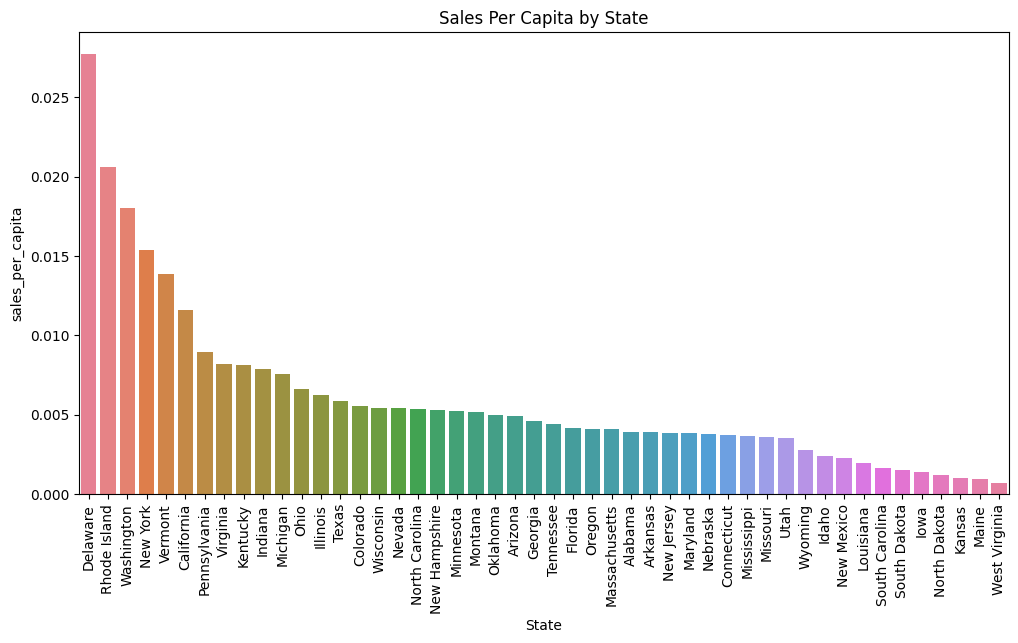

In [3]:
# Exploratory Data Analysis (EDA) with separate colors for each state
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', len(merged_data))  # Create a distinct color for each state
sns.barplot(x='State', y='sales_per_capita', 
            data=merged_data.sort_values(by='sales_per_capita', ascending=False), 
            palette=colors)  # Use the colors palette
plt.xticks(rotation=90)
plt.title('Sales Per Capita by State')
plt.show()

/tmp/ipykernel_148/4245253909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


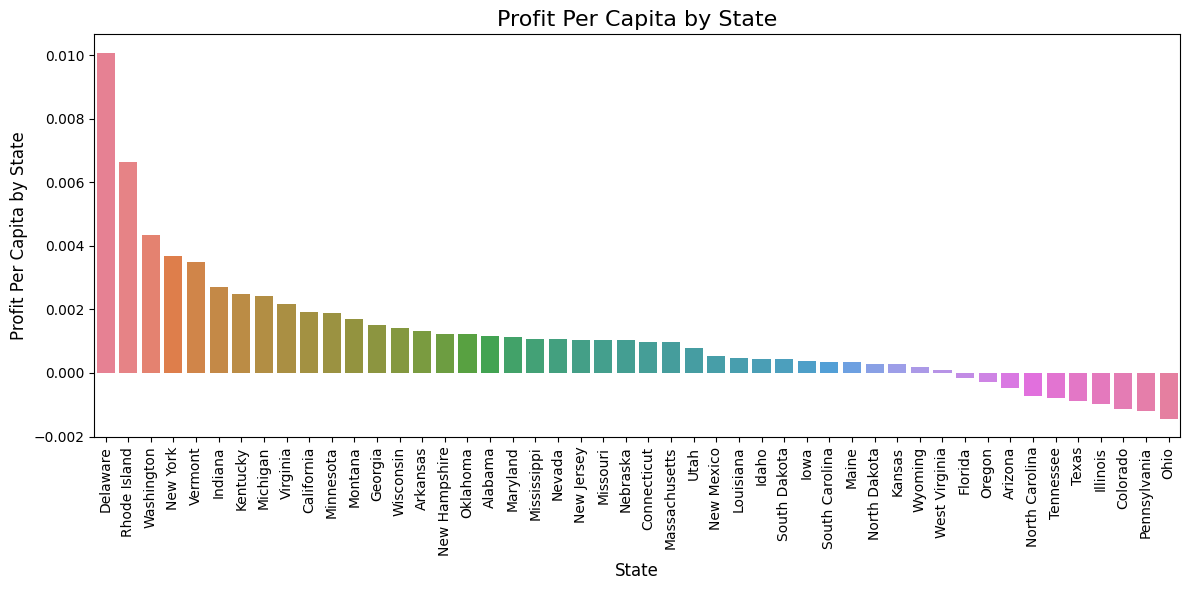

In [4]:
# Visualizing Profit Margin by State (Profit per Capita)
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', len(merged_data))  # Create a distinct color for each state
sns.barplot(
    x='State', 
    y='profit_per_capita', 
    data=merged_data.sort_values(by='profit_per_capita', ascending=False), 
    palette=colors  # Use the color palette
)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Profit Per Capita by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Profit Per Capita by State', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

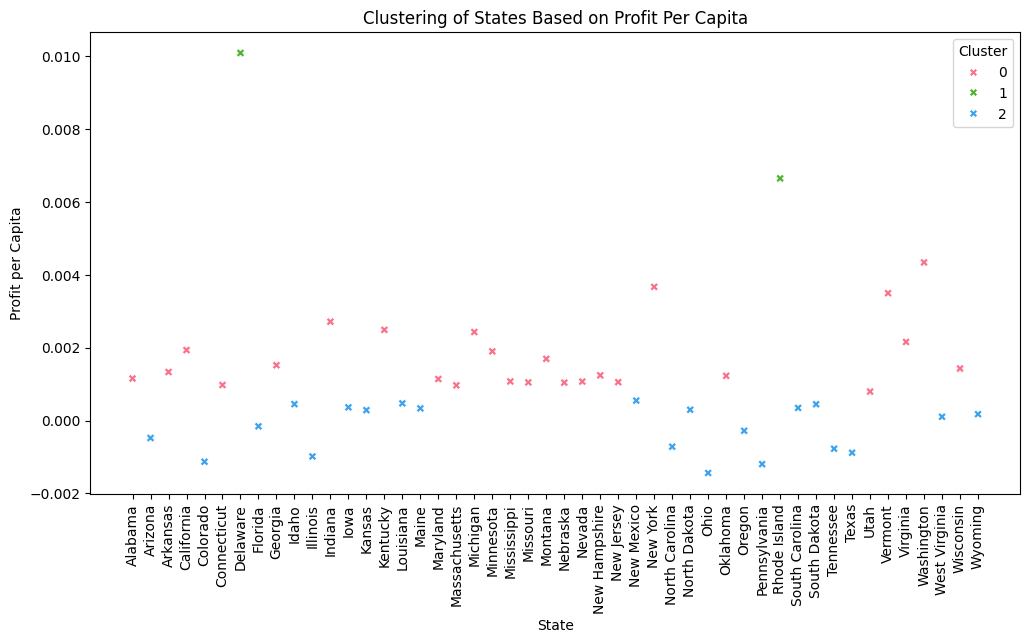

In [5]:
# Prepare the data for clustering
features = ['profit_per_capita']
X = merged_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality for better visualization, if necessary
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X_pca)

# Visualize the clustering
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', len(set(merged_data['cluster'])))
sns.scatterplot(x=merged_data['State'], y=merged_data['profit_per_capita'], hue=merged_data['cluster'], palette=colors, marker='X')
plt.xticks(rotation=90)
plt.title('Clustering of States Based on Profit Per Capita')
plt.xlabel('State')
plt.ylabel('Profit per Capita')
plt.legend(title='Cluster')
plt.show()

The clustering process has been successfully applied, and the clusters along with the profit per capita (Profit_to_Population) for each state are now available. Let me know if you need further analysis or visualization.

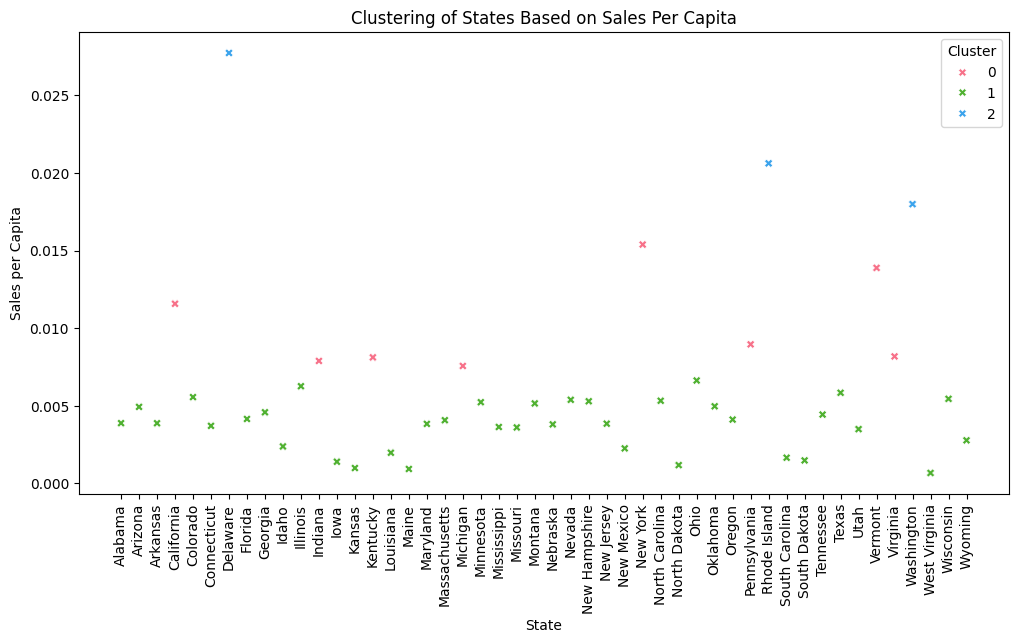

In [6]:
# Prepare the data for clustering
features = ['sales_per_capita']
X = merged_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality for better visualization, if necessary
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X_pca)

# Visualize the clustering
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', len(set(merged_data['cluster'])))
sns.scatterplot(x=merged_data['State'], y=merged_data['sales_per_capita'], hue=merged_data['cluster'], palette=colors, marker='X')
plt.xticks(rotation=90)
plt.title('Clustering of States Based on Sales Per Capita')
plt.xlabel('State')
plt.ylabel('Sales per Capita')
plt.legend(title='Cluster')
plt.show()

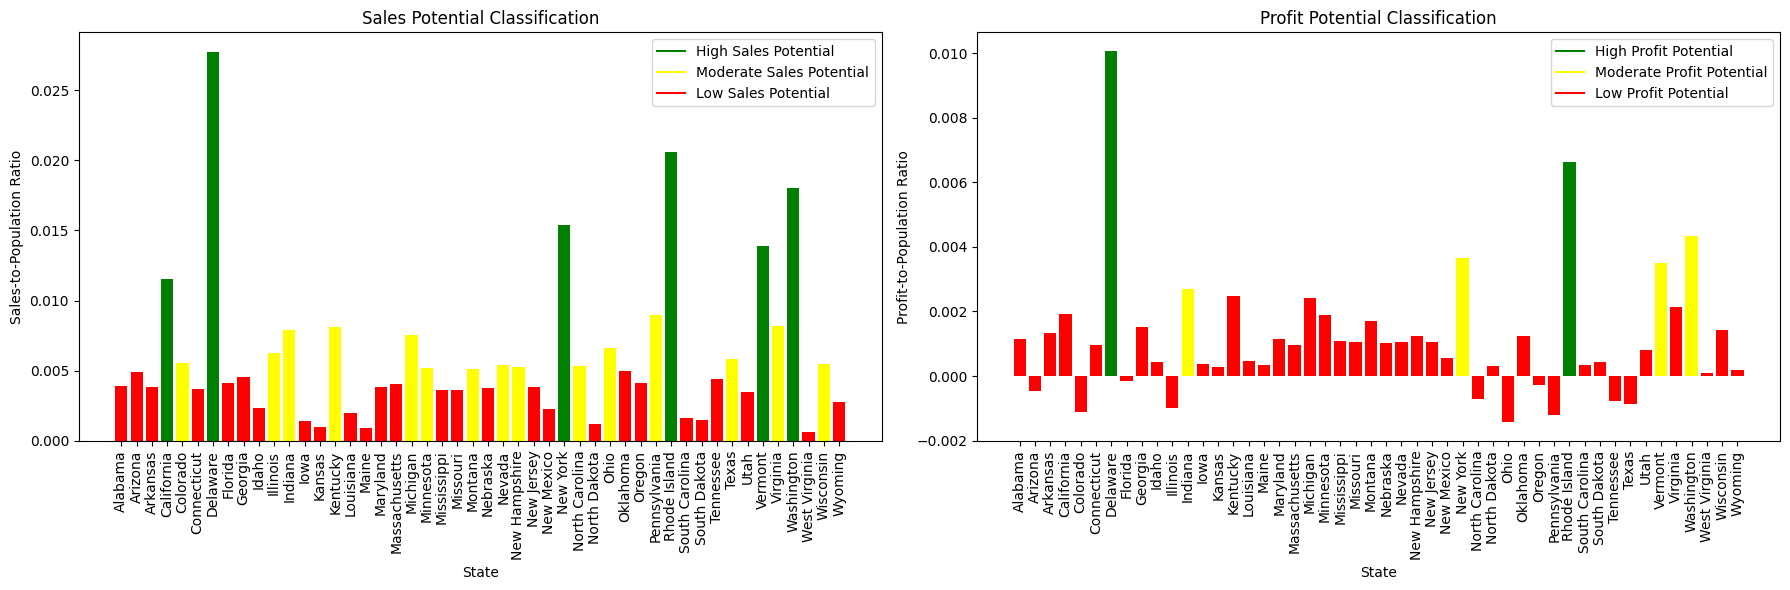

In [7]:
# Elijah
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading the datasets
superstore = pd.read_csv('SampleSuperstore.csv')
state_populations = pd.read_csv('us_pop_by_state.csv')

# 2. Data Preprocessing
# Superstore dataset(Grouping by state and calculating total sales and profit)
state_sales_profit = superstore.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Merging with the state populations dataset
merged_data = pd.merge(state_sales_profit, state_populations, left_on = 'State', right_on = 'state')

# Calculation of sales-to-population and profit-to-population ratios
merged_data['Sales_to_Population'] = merged_data['Sales'] / merged_data['2020_census']
merged_data['Profit_to_Population'] = merged_data['Profit'] / merged_data['2020_census']

# 3. Define classification thresholds
sales_thresholds = [0.005, 0.01]
profit_thresholds = [0.0025, 0.005]

# Function to classify based on sales
def classify_sales(row):
    if row['Sales_to_Population'] > sales_thresholds[1]:
        return 'High Sales Potential'
    elif row['Sales_to_Population'] > sales_thresholds[0]:
        return 'Moderate Sales Potential'
    else:
        return 'Low Sales Potential'

# Function to classify based on profit
def classify_profit(row):
    if row['Profit_to_Population'] > profit_thresholds[1]:
        return 'High Profit Potential'
    elif row['Profit_to_Population'] > profit_thresholds[0]:
        return 'Moderate Profit Potential'
    else:
        return 'Low Profit Potential'

# Apply the classification functions
merged_data['Sales_Classification'] = merged_data.apply(classify_sales, axis = 1)
merged_data['Profit_Classification'] = merged_data.apply(classify_profit, axis = 1)

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Sales Classification Bar Plot
axes[0].bar(merged_data['State'], merged_data['Sales_to_Population'], color = merged_data['Sales_Classification'].map({'High Sales Potential': 'green', 'Moderate Sales Potential': 'yellow', 'Low Sales Potential': 'red'}))
axes[0].set_xticks(range(len(merged_data['State'])))
axes[0].set_xticklabels(merged_data['State'], rotation=90)
axes[0].set_xlabel('State')
axes[0].set_ylabel('Sales-to-Population Ratio')
axes[0].set_title('Sales Potential Classification')

# Profit Classification Bar Plot
axes[1].bar(merged_data['State'], merged_data['Profit_to_Population'], color = merged_data['Profit_Classification'].map({'High Profit Potential': 'green', 'Moderate Profit Potential': 'yellow', 'Low Profit Potential': 'red'}))
axes[1].set_xticks(range(len(merged_data['State'])))
axes[1].set_xticklabels(merged_data['State'], rotation=90)
axes[1].set_xlabel('State')
axes[1].set_ylabel('Profit-to-Population Ratio')
axes[1].set_title('Profit Potential Classification')

# Legends
handles_sales = [plt.Line2D([0], [0], color='green'), 
                 plt.Line2D([0], [0], color='yellow'), 
                 plt.Line2D([0], [0], color='red')]
labels_sales = ['High Sales Potential', 'Moderate Sales Potential', 'Low Sales Potential']
axes[0].legend(handles = handles_sales, labels = labels_sales)

handles_profit = [plt.Line2D([0], [0], color='green'), 
                  plt.Line2D([0], [0], color='yellow'), 
                  plt.Line2D([0], [0], color='red')]
labels_profit = ['High Profit Potential', 'Moderate Profit Potential', 'Low Profit Potential']
axes[1].legend(handles = handles_profit, labels = labels_profit)

plt.tight_layout()
plt.show()

1871
Information Gain for each feature: {'Ship Mode': 0.0010942622103631283, 'Segment': 0.0002306271183806219, 'Country': 0.0, 'City': 0.2026113454050975, 'State': 0.20772388130818004, 'Postal Code': 0.23681512590165182, 'Region': 0.030933780874454087, 'Category': 0.025646013199453144, 'Sub-Category': 0.15839332857392563, 'Sales': 0.6062494141147751, 'Quantity': 0.001127511592176833, 'Discount': 0.4566164363579983, 'Profit': 0.6956033032846098, 'Population': 0.011387766030336421}
<class 'dict'>
['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Population']
[0.0010942622103631283, 0.0002306271183806219, 0.0, 0.2026113454050975, 0.20772388130818004, 0.23681512590165182, 0.030933780874454087, 0.025646013199453144, 0.15839332857392563, 0.6062494141147751, 0.001127511592176833, 0.4566164363579983, 0.6956033032846098, 0.011387766030336421]


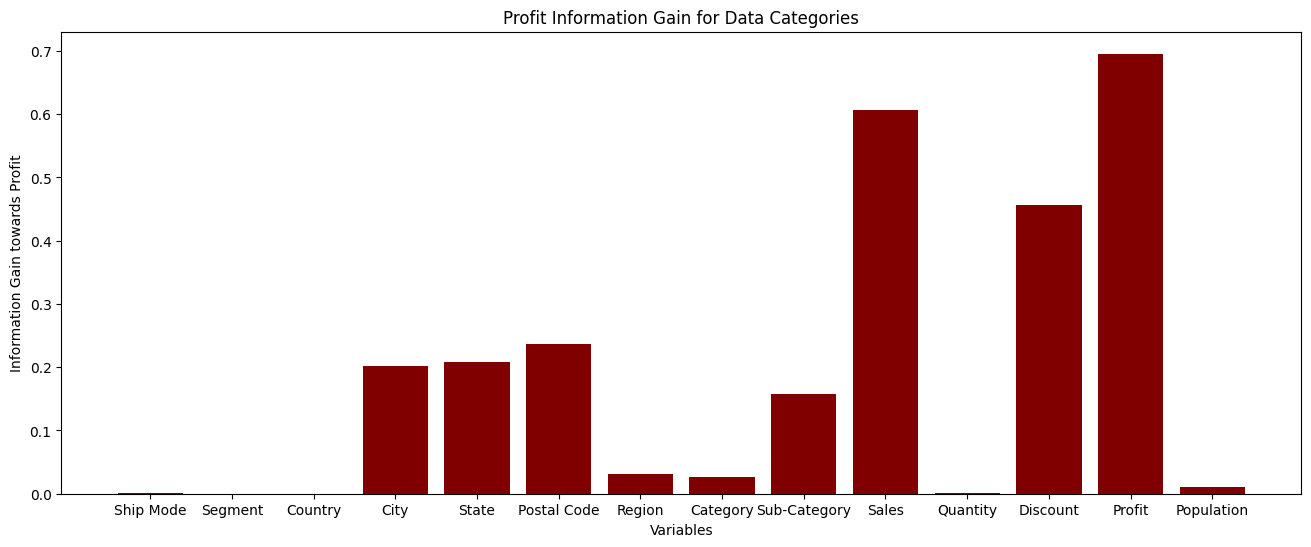

In [8]:
# Dan
df_store = pd.read_csv('SampleSuperstore.csv')
df_pop = pd.read_csv('us_pop_by_state.csv')

profit = []
count = 0
df_store['Profit'] = df_store['Profit'].astype(float)
for i in range(len(df_store)):
  if df_store['Profit'][i] >= 0:
    profit.append(1)
  else:
    profit.append(0)
    count += 1
print(count)
df_store['Target'] = profit

Low_State_List = []
Med_State_List = []
High_State_List = []
for i in range(len(df_pop)):
  if df_pop['2020_census'][i] < 2.5 * 10**6:
    Low_State_List.append(df_pop["state"][i])
  elif 2.5 * 10**6 < df_pop['2020_census'][i] < 7.5 * 10**6:
    Med_State_List.append(df_pop["state"][i])
  else:
    High_State_List.append(df_pop["state"][i])

Population = []
for i in range(len(df_store)):
  if df_store["State"][i] in Low_State_List:
    Population.append("Low")
  elif df_store["State"][i] in Med_State_List:
    Population.append("Medium")
  elif df_store["State"][i] in High_State_List:
    Population.append("High")
  else: 
    Population.append("Unknown")
    continue

df_store['Population'] = Population

import pandas as pd
import numpy as np
from collections import Counter

# Function to calculate entropy
def entropy(labels):
    """
    Calculate entropy of a list of class labels.
    """
    total = len(labels)
    counts = Counter(labels)
    probabilities = [count / total for count in counts.values()]
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

# Function to calculate information gain
def information_gain(parent_labels, left_labels, right_labels):
    """
    Calculate information gain from splitting a parent node into two child nodes.
    """
    total = len(parent_labels)
    parent_entropy = entropy(parent_labels)
    left_weight = len(left_labels) / total
    right_weight = len(right_labels) / total
    children_entropy = left_weight * entropy(left_labels) + right_weight * entropy(right_labels)
    return parent_entropy - children_entropy

# Function to calculate IG for all features
def calculate_ig_for_dataframe(df, target_column):
    """
    Calculate information gain for each feature in the DataFrame.
    
    Parameters:
    - df: pandas DataFrame
    - target_column: The name of the column containing the class labels (target).
    
    Returns:
    - A dictionary of IG values for each feature.
    """
    ig_dict = {}
    target = df[target_column]

    for feature in df.columns:
        if feature == target_column:
            continue  # Skip the target column

        # Calculate IG for this feature
        feature_values = df[feature]
        unique_values = feature_values.unique()
        parent_labels = target

        # Create splits for each unique feature value
        weighted_entropy = 0
        for value in unique_values:
            split_labels = target[feature_values == value]
            weight = len(split_labels) / len(parent_labels)
            weighted_entropy += weight * entropy(split_labels)

        ig_dict[feature] = entropy(parent_labels) - weighted_entropy

    return ig_dict

# Example usage
#data = {
   # "Feature1": ["A", "A", "B", "B", "C", "C"],
   # "Feature2": [1, 1, 0, 0, 1, 0],
   # "Target": [1, 1, 0, 0, 1, 0],
#df = pd.DataFrame(data)

ig_results = calculate_ig_for_dataframe(df_store, target_column="Target")
print("Information Gain for each feature:", ig_results)
print(type(ig_results))

ig_results = dict.items(ig_results)

keys = []
values = []
for key, value in ig_results:
    keys.append(key)
    values.append(value)

print(keys)
print(values)
fig, ax = plt.subplots(figsize=(16, 6))
plt.bar(keys, values, color ='maroon')

plt.xlabel("Variables")
plt.ylabel("Information Gain towards Profit")
plt.title("Profit Information Gain for Data Categories")
plt.show()

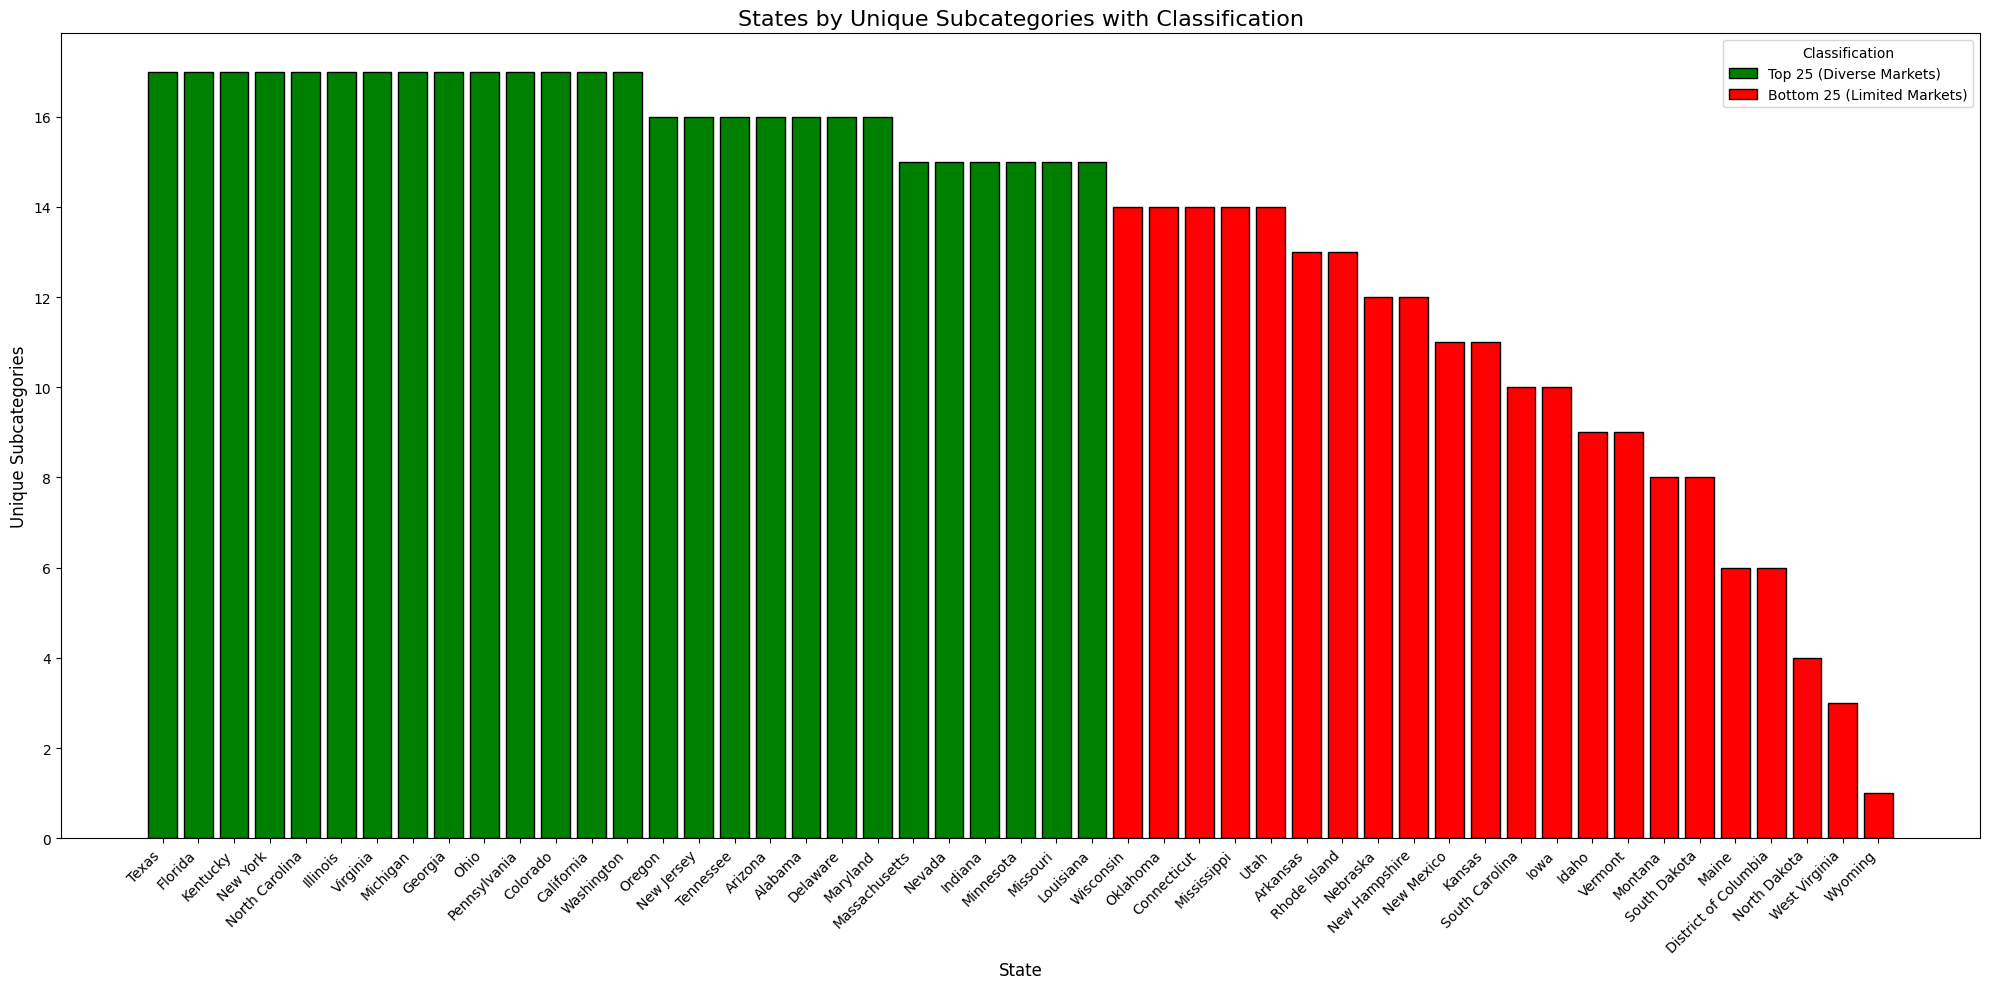

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/work/SampleSuperstore.csv")

# Count unique subcategories per state
subcategory_counts = data.groupby("State")["Sub-Category"].nunique()

# Create a ranked DataFrame
ranked_states = subcategory_counts.sort_values(ascending=False).reset_index()
ranked_states.columns = ["State", "Unique Subcategories"]

# Add rank column
ranked_states["Rank"] = ranked_states["Unique Subcategories"].rank(ascending=False, method="min").astype(int)

# Classify based on rank
ranked_states["Classification"] = np.where(
    ranked_states["Rank"] <= 25, "Top 25 (Diverse Markets)",
    np.where(ranked_states["Rank"] > len(ranked_states) - 25, "Bottom 25 (Limited Markets)", "Middle Markets")
)

# Map colors based on classification
colors = ranked_states["Classification"].map({
    "Top 25 (Diverse Markets)": "green",
    "Bottom 25 (Limited Markets)": "red"
})

# Plot the data with spaces between bars
plt.figure(figsize=(20, 10))
plt.bar(ranked_states["State"], ranked_states["Unique Subcategories"], color=colors, edgecolor="black", width=0.8)

# Add labels and title
plt.title("States by Unique Subcategories with Classification", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Unique Subcategories", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="green", edgecolor="black", label="Top 25 (Diverse Markets)"),
    Patch(facecolor="red", edgecolor="black", label="Bottom 25 (Limited Markets)")
]
plt.legend(handles=legend_elements, title="Classification")

# Show the plot
plt.show()


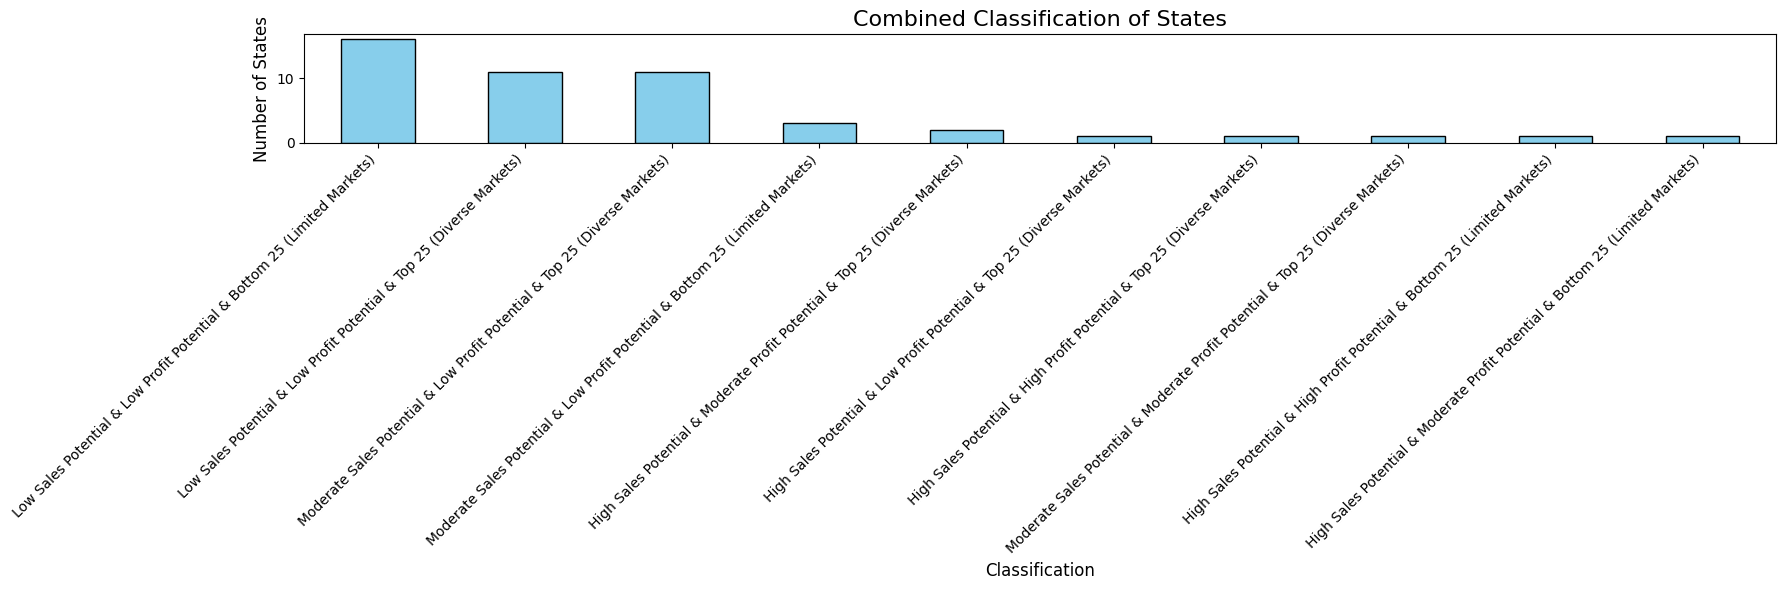

,State,Sales,Profit,rank,state,state_code,2020_census,percent_of_total,Sales_to_Population,Profit_to_Population,Sales_Classification,Profit_Classification,Classification,Combined_Classification
0,Alabama,19510.6400,5786.8253,24.0,Alabama,AL,5024279,0.0148,0.003883,0.001152,Low Sales Potential,Low Profit Potential,Top 25 (Diverse Markets),Low Sales Potential & Low Profit Potential & T...
1,Arizona,35282.0010,-3427.9246,14.0,Arizona,AZ,7151502,0.0219,0.004934,-0.000479,Low Sales Potential,Low Profit Potential,Top 25 (Diverse Markets),Low Sales Potential & Low Profit Potential & T...
2,Arkansas,11678.1300,4008.6871,33.0,Arkansas,AR,3011524,0.0091,0.003878,0.001331,Low Sales Potential,Low Profit Potential,Bottom 25 (Limited Markets),Low Sales Potential & Low Profit Potential & B...
3,California,457687.6315,76381.3871,1.0,California,CA,39538223,0.1191,0.011576,0.001932,High Sales Potential,Low Profit Potential,Top 25 (Diverse Markets),High Sales Potential & Low Profit Potential & ...
4,Colorado,32108.1180,-6527.8579,21.0,Colorado,CO,5773714,0.0174,0.005561,-0.001131,Moderate Sales Potential,Low Profit Potential,Top 25 (Diverse Markets),Moderate Sales Potential & Low Profit Potentia...
5,Connecticut,13384.3570,3511.4918,29.0,Connecticut,CT,3605944,0.0107,0.003712,0.000974,Low Sales Potential,Low Profit Potential,Bottom 25 (Limited Markets),Low Sales Potential & Low Profit Potential & B...
6,Delaware,27451.0690,9977.3748,45.0,Delaware,DE,989948,0.0029,0.027730,0.010079,High Sales Potential,High Profit Potential,Top 25 (Diverse Markets),High Sales Potential & High Profit Potential &...
7,Florida,89473.7080,-3399.3017,3.0,Florida,FL,21538187,0.0647,0.004154,-0.000158,Low Sales Potential,Low Profit Potential,Top 25 (Diverse Markets),Low Sales Potential & Low Profit Potential & T...
8,Georgia,49095.8400,16250.0433,8.0,Georgia,GA,10711908,0.0320,0.004583,0.001517,Low Sales Potential,Low Profit Potential,Top 25 (Diverse Markets),Low Sales Potential & Low Profit Potential & T...
9,Idaho,4382.4860,826.7231,38.0,Idaho,ID,1839106,0.0054,0.002383,0.000450,Low Sales Potential,Low Profit Potential,Bottom 25 (Limited Markets),Low Sales Potential & Low Profit Potential & B...


In [10]:
# Merge diversity classification into the main dataset
merged_data = pd.merge(
    merged_data,
    ranked_states[['State', 'Classification']],  # Assuming 'Classification' has diversity info
    on='State',
    how='left'
)

# Combine classifications into a new column
def combine_classifications(row):
    combined = f"{row['Sales_Classification']} & {row['Profit_Classification']}"
    if pd.notna(row['Classification']):
        combined += f" & {row['Classification']}"
    return combined

merged_data['Combined_Classification'] = merged_data.apply(combine_classifications, axis=1)

# Visualization: Combined Classifications
plt.figure(figsize=(18, 6))
combined_class_summary = merged_data['Combined_Classification'].value_counts()
combined_class_summary.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Combined Classification of States", fontsize=16)
plt.xlabel("Classification", fontsize=12)
plt.ylabel("Number of States", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the DataFrame with combined classifications
display(merged_data)


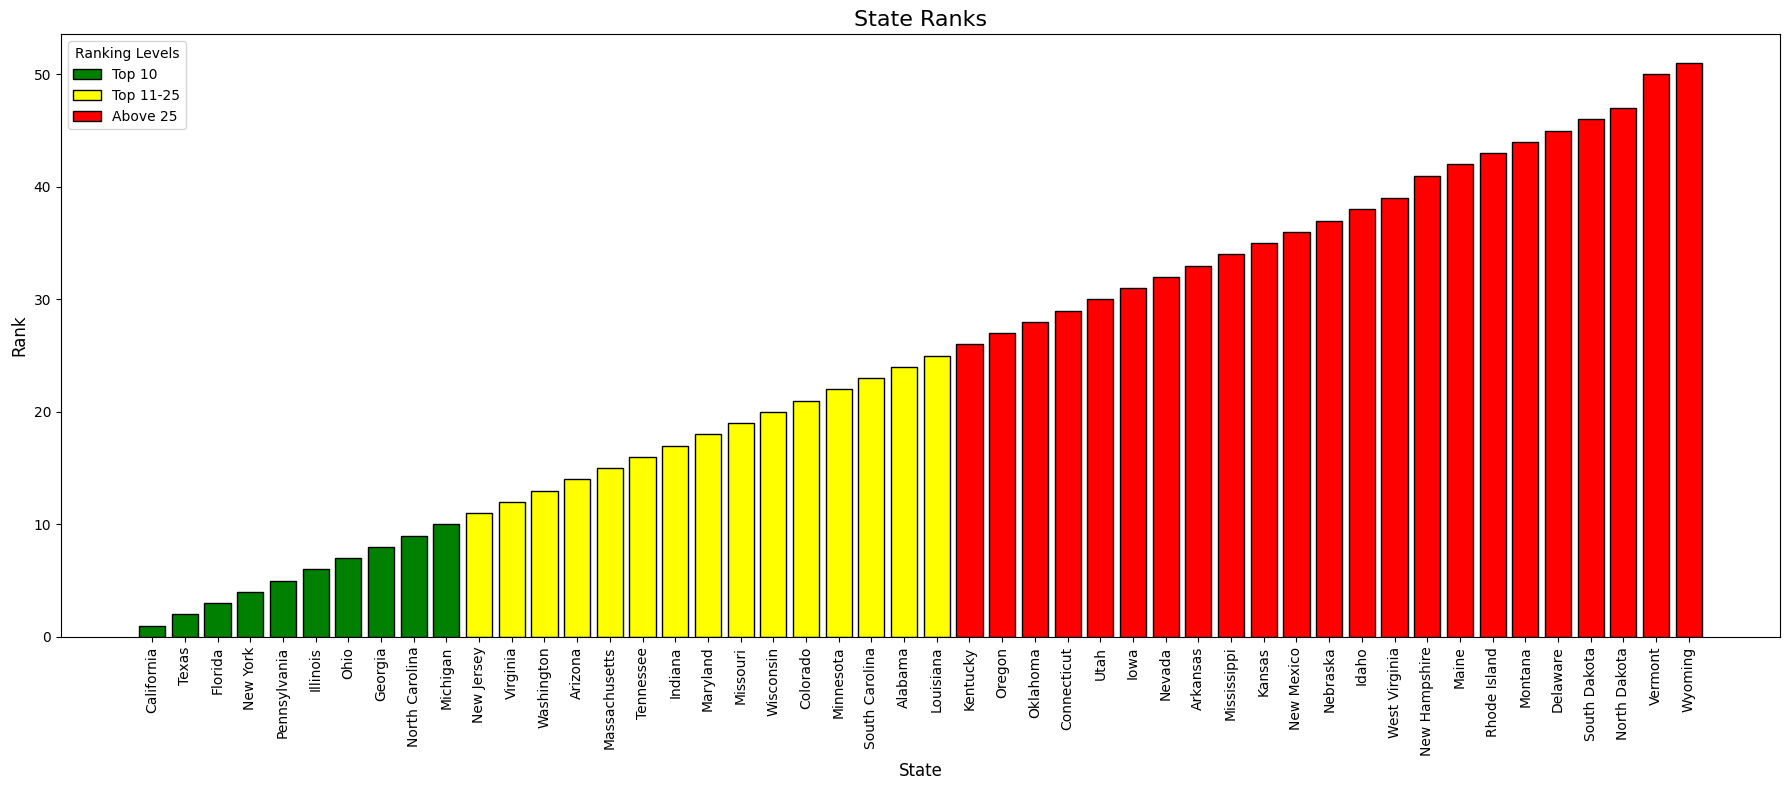

In [11]:
import matplotlib.pyplot as plt

# Sort the merged data by rank
sorted_data = merged_data.sort_values(by='rank', ascending=True)

# Assign colors based on rank
colors = ['green' if rank <= 10 else 'yellow' if rank <= 25 else 'red' for rank in sorted_data['rank']]

# Plot the ranks of all states
plt.figure(figsize=(18, 8))
plt.bar(sorted_data['State'], sorted_data['rank'], color=colors, edgecolor='black')

# Add labels and title
plt.title("State Ranks", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Rank", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="green", edgecolor="black", label="Top 10"),
    Patch(facecolor="yellow", edgecolor="black", label="Top 11-25"),
    Patch(facecolor="red", edgecolor="black", label="Above 25")
]
plt.legend(handles=legend_elements, title="Ranking Levels")

# Show the plot
plt.show()

In [12]:
missing_percentage = merged_data.isnull().sum().sum() / merged_data.size * 100
print(f"Missing Data Percentage: {missing_percentage:.2f}%")

Missing Data Percentage: 0.00%


In [13]:
sales_class_distribution = merged_data['Sales_Classification'].value_counts(normalize=True)
profit_class_distribution = merged_data['Profit_Classification'].value_counts(normalize=True)
print("Sales Classification Distribution:\n", sales_class_distribution)
print("Profit Classification Distribution:\n", profit_class_distribution)


Sales Classification Distribution:
 Sales_Classification
Low Sales Potential         0.5625
Moderate Sales Potential    0.3125
High Sales Potential        0.1250
Name: proportion, dtype: float64
Profit Classification Distribution:
 Profit_Classification
Low Profit Potential         0.875000
Moderate Profit Potential    0.083333
High Profit Potential        0.041667
Name: proportion, dtype: float64


In [14]:
# Import required libraries
import pandas as pd

# Load the datasets
superstore = pd.read_csv('SampleSuperstore.csv')
state_populations = pd.read_csv('us_pop_by_state.csv')

# Preprocess the datasets
# Group Superstore data by state and calculate total sales and profit
state_sales_profit = superstore.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Merge the processed data with state populations
merged_data = pd.merge(state_sales_profit, state_populations, left_on='State', right_on='state')

# Calculate additional features
merged_data['Sales_to_Population'] = merged_data['Sales'] / merged_data['2020_census']
merged_data['Profit_to_Population'] = merged_data['Profit'] / merged_data['2020_census']

# Ensure "Unique Subcategories" column exists; otherwise, exclude it
if 'Unique Subcategories' not in merged_data.columns:
    correlation = merged_data[['Sales_to_Population', 'Profit_to_Population']].corr()
else:
    correlation = merged_data[['Unique Subcategories', 'Sales_to_Population', 'Profit_to_Population']].corr()

print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                       Sales_to_Population  Profit_to_Population
Sales_to_Population              1.000000              0.827951
Profit_to_Population             0.827951              1.000000


In [15]:
states_plotted = merged_data['State'].nunique()
total_states = state_populations['state'].nunique()
print(f"States Plotted: {states_plotted}/{total_states}")

States Plotted: 48/52


> silhoutte score for both the clustering

In [16]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for profit_per_capita clustering
profit_features = ['profit_per_capita']
profit_X = merged_data[profit_features]
profit_X_scaled = scaler.fit_transform(profit_X)
profit_pca = PCA(n_components=1)
profit_X_pca = profit_pca.fit_transform(profit_X_scaled)
profit_silhouette = silhouette_score(profit_X_pca, merged_data['cluster'])

# Calculate silhouette score for sales_per_capita clustering
sales_features = ['sales_per_capita']
sales_X = merged_data[sales_features]
sales_X_scaled = scaler.fit_transform(sales_X)
sales_pca = PCA(n_components=1)
sales_X_pca = sales_pca.fit_transform(sales_X_scaled)
sales_silhouette = silhouette_score(sales_X_pca, merged_data['cluster'])

profit_silhouette, sales_silhouette

KeyError: "None of [Index(['profit_per_capita'], dtype='object')] are in the [columns]"

In [2]:
# Re-import necessary libraries and re-load the merged_data dataframe
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Reload the merged_data dataframe
superstore = pd.read_csv('SampleSuperstore.csv')
population = pd.read_csv('us_pop_by_state.csv')

# Preprocessing Superstore Dataset
superstore_agg = superstore.groupby('State').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    transaction_count=('Segment', 'count')
).reset_index()

# Preprocessing Population Dataset
population.rename(columns={'state': 'State', 'Population': 'population'}, inplace=True)

# Merge datasets on State
merged_data = pd.merge(superstore_agg, population, on='State', how='inner')

# Feature Engineering
merged_data['sales_per_capita'] = merged_data['total_sales'] / merged_data['2020_census']
merged_data['profit_per_capita'] = merged_data['total_profit'] / merged_data['2020_census']

# Prepare the data for clustering
features = ['profit_per_capita']
profit_X = merged_data[features]

# Standardize the features
scaler = StandardScaler()
profit_X_scaled = scaler.fit_transform(profit_X)

# Reduce dimensionality for better visualization, if necessary
pca = PCA(n_components=1)
profit_X_pca = pca.fit_transform(profit_X_scaled)

# Perform k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['profit_cluster'] = kmeans.fit_predict(profit_X_pca)

# Calculate silhouette score for profit_per_capita clustering
profit_silhouette = silhouette_score(profit_X_pca, merged_data['profit_cluster'])

# Repeat for sales_per_capita clustering
features = ['sales_per_capita']
sales_X = merged_data[features]
sales_X_scaled = scaler.fit_transform(sales_X)
sales_X_pca = pca.fit_transform(sales_X_scaled)
merged_data['sales_cluster'] = kmeans.fit_predict(sales_X_pca)
sales_silhouette = silhouette_score(sales_X_pca, merged_data['sales_cluster'])

profit_silhouette, sales_silhouette

(0.5205434398474948, 0.6231358103213682)

The silhouette score for the profit_per_capita clustering is 0.52, and for the sales_per_capita clustering, it is 0.62.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ca37007-c8f7-4597-bdce-9b09a0516dc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>